In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad_vec
from tqdm import tqdm

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 200,
})

In [65]:
R=12e-6
Q0=104.15
A=10784
D=150

def Q_linear(x,t):
  return A*np.exp(-x**2/(4*D*t))*np.exp(-2*Q0*R*t)/(2*np.sqrt(np.pi)*np.sqrt(D)*np.sqrt(t))

def integrand(t0,x,t):
  return -A**2*R*np.exp(-(2*D*Q0*R*t0*(t+t0)-x**2*(t-t0)/(2*t-t0)+x**2/2)/(D*t0))*np.sqrt(t-t0)/(4*np.pi*np.sqrt(D)*np.sqrt(t0)*np.sqrt(t-t0)*np.sqrt(2*t-t0))

def perturbation(x,t):
  return quad(lambda t0: integrand(t0,x,t),0,t)[0]

# Define the range of x and t values
t_values = np.linspace(50,0,1000, endpoint=False)[::-1]
x_values = np.linspace(0,400,400)


# Create a meshgrid for x and t
X, T = np.meshgrid(x_values, t_values)

# Compute the values of f(x, t) for all combinations of x and t
L = np.vectorize(Q_linear)(X,T)
P = np.vectorize(perturbation)(X,T)

In [77]:
Lmirror=np.concatenate((L[:,-1:1:-1],L),axis=1)
Pmirror=np.concatenate((P[:,-1:1:-1],P),axis=1)
x_valuesmirror=np.concatenate((-x_values[-1:1:-1],x_values),axis=0)

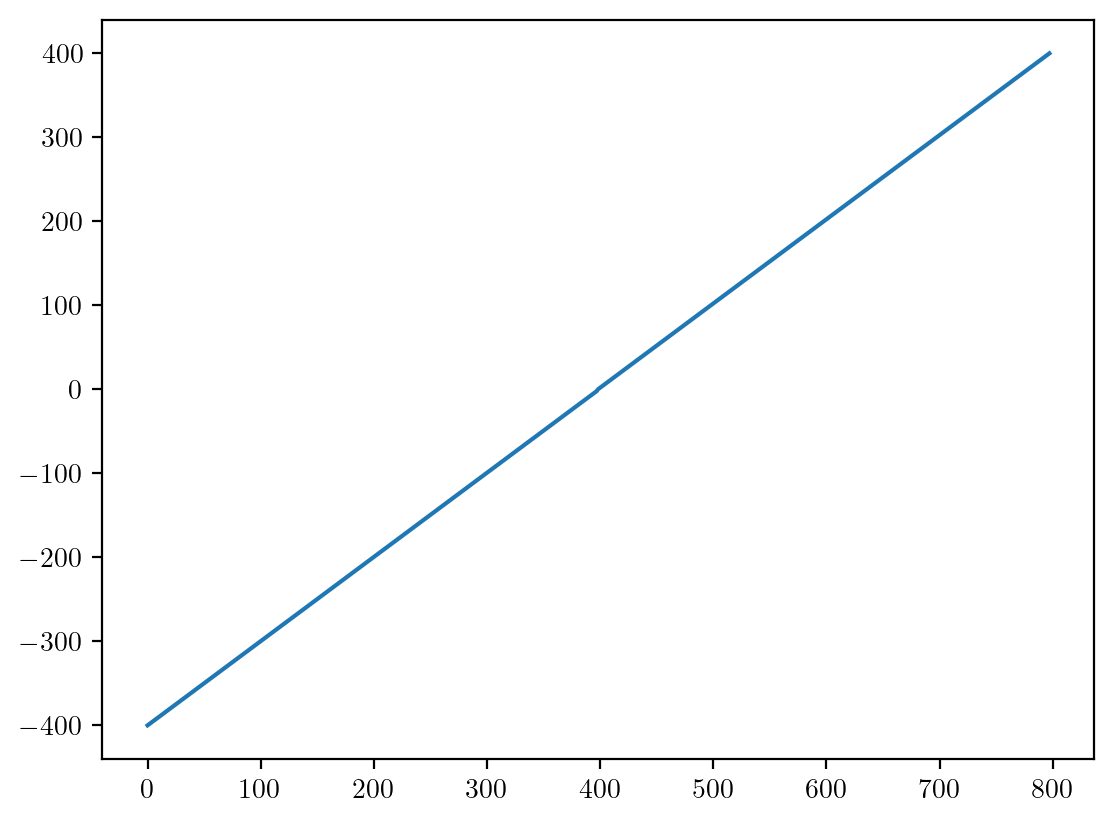

In [78]:
plt.plot(x_valuesmirror)

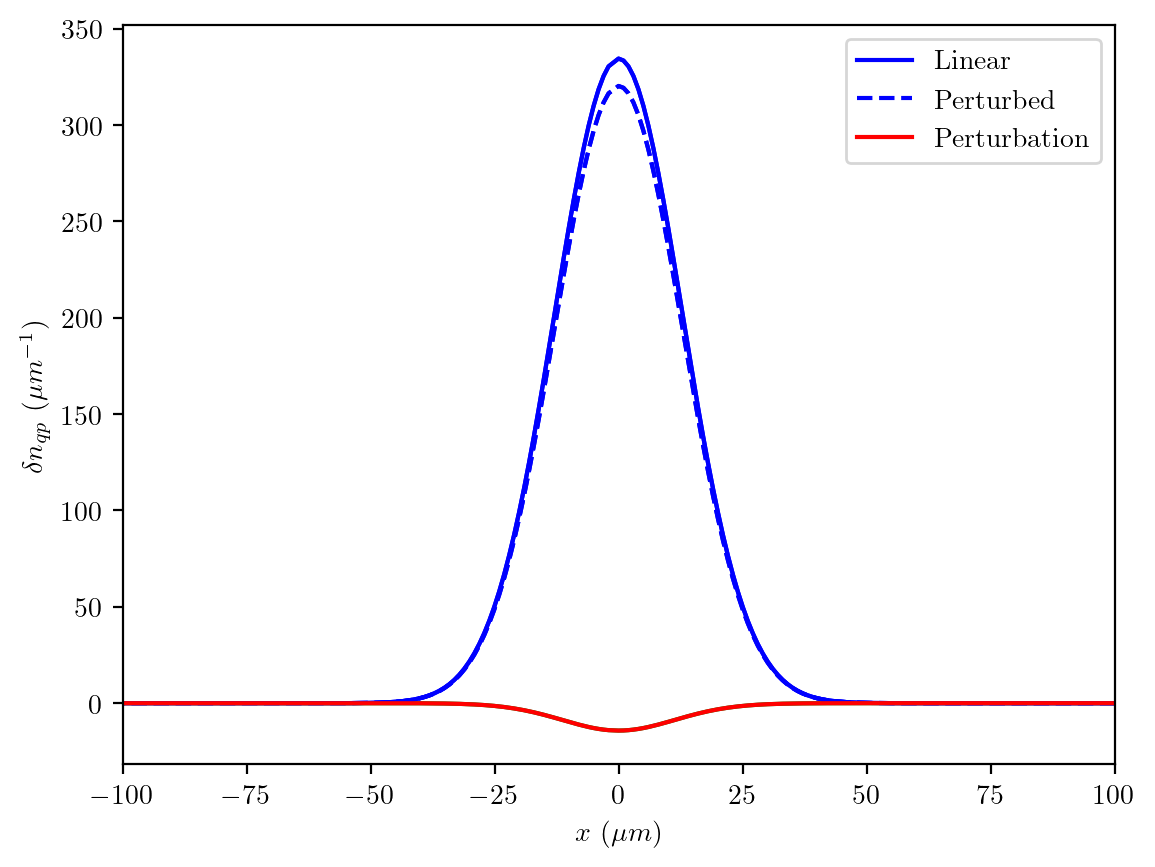

In [85]:
for i,t in list(enumerate(t_values))[10:11:10]:
  plt.plot(x_valuesmirror,Lmirror[i],color='b')
  plt.plot(x_valuesmirror,(Lmirror+Pmirror)[i],color='b',ls='--')
  plt.plot(x_valuesmirror,Pmirror[i],color='g')
plt.plot(x_valuesmirror,Lmirror[i],color='b',label='Linear')
plt.plot(x_valuesmirror,(Lmirror+Pmirror)[i],color='b',ls='--',label='Perturbed')
plt.plot(x_valuesmirror,Pmirror[i],color='r',label='Perturbation')
plt.xlim(-100,100)
plt.ylabel('$\delta n_{qp}$ ($\mu m^{-1}$)')
plt.xlabel('$x$ ($\mu m$)')
plt.legend()

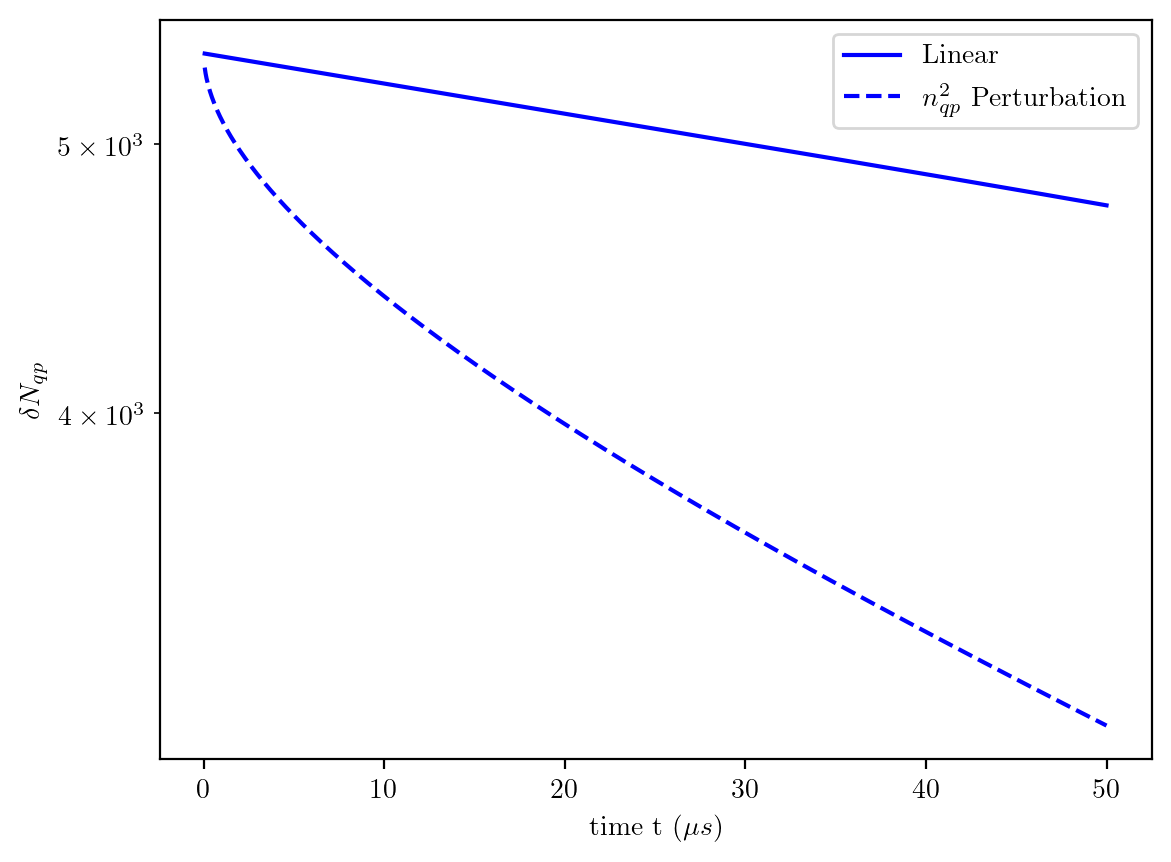

In [69]:
start=0
for A in [1]:
  plt.semilogy(t_values[start:],np.trapz(A*L[start:],x_values,axis=1),color='b',label='Linear')
  plt.semilogy(t_values[start:],np.trapz((A*L+A**2*P)[start:],x_values,axis=1),color='b',ls='--',label='$n_{qp}^2$ Perturbation')
plt.xlabel(r'time t ($\mu s$)')
plt.ylabel(r'$\delta N_{qp}$')
plt.legend()